# Q-Learning


Importamos las librerías necesarias:
- **Gym**: entorno de aprendizaje por refuerzo
- **NumPy**: operaciones matriciales
- **Matplotlib**: visualización

In [1]:
!pip install -q gym matplotlib

In [31]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


Creamos el entorno Frozen Lake, un entorno de aprendizaje por refuerzo donde un agente debe navegar un lago congelado para llegar al objetivo sin caer en los agujeros.

In [32]:
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()  # Reiniciamos el entorno
environment.render()  # lo respresentamos

Obtenemos el número de estados y acciones posibles en el entorno. Inicializamos la tabla Q con ceros, donde qtable[state, action] representa el valor de la acción para el estado dado.

In [33]:
nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros((nb_states, nb_actions))

## Q-Learning

### Inicialización

Definimos los hiperparámetros del algoritmo:
- *episodes*: número de episodios
- *alpha*: tasa de aprendizaje
- *gamma*: factor de descuento

In [34]:
episodes = 1000
alpha = 0.5
gamma = 0.9

In [35]:
# Lista de resultados para graficar
outcomes = []

print('Q-table antes del entrenamiento:')
print(qtable)

Q-table antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Entrenamiento
Realizamos el entrenamiento del agente a lo largo de varios episodios.
En cada episodio, el agente toma acciones, actualiza la tabla Q y ajusta su comportamiento basándose en las recompensas obtenidas.

In [36]:
for _ in range(episodes):
    state = environment.reset()
    done = False
    outcomes.append("Fracaso")

    while not done:
        # Elige la acción con el valor más alto en el estado actual
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        # Si no hay una mejor acción (solo ceros), elige una aleatoria
        else:
            action = environment.action_space.sample()

        # Implementa la acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualiza Q(s,a)
        qtable[state, action] = qtable[state, action] + alpha * (
            reward + gamma * np.max(qtable[new_state]) - qtable[state, action]
        )

        # Actualiza el estado actual
        state = new_state

        # Si hay una recompensa, significa que nuestro resultado es un éxito
        if reward:
            outcomes[-1] = "Éxito"

print()
print('===========================================')
print('Q-table después del entrenamiento (CASO 1):')
print(qtable)


Q-table después del entrenamiento (CASO 1):
[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


Utilizamos Matplotlib para crear un gráfico de barras que muestra los resultados de cada episodio (éxito o fracaso).

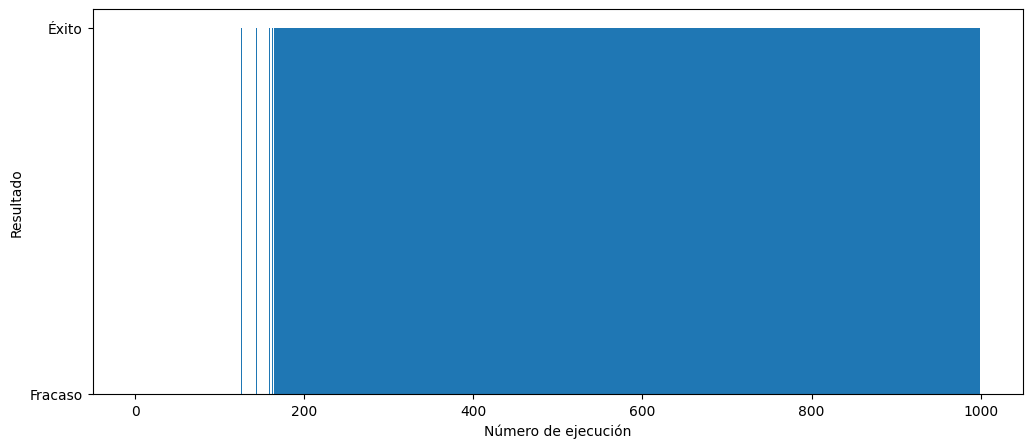

In [37]:
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

### Evaluación
Evaluamos el desempeño del agente después del entrenamiento.

In [38]:
episodes_eval = 100
success_count = 0

for _ in range(episodes_eval):
    state = environment.reset()
    done = False

    while not done:
        # Elige la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implementa la acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualiza el estado actual
        state = new_state

        # Cuando obtenemos una recompensa, significa que hemos resuelto el juego
        success_count += reward

La tasa de éxito del agente representa el porcentaje de episodios en los que el agente alcanzó el objetivo después del entrenamiento:

In [39]:
success_rate = success_count / episodes_eval * 100
print(f"Tasa de éxito = {success_rate}%")

Tasa de éxito = 100.0%


## Algoritmo Epsilon-Greedy
Vamos a implementar ahora el algoritmo Epsilon-Greedy para el aprendizaje por refuerzo en el entorno Frozen Lake. La política epsilon-greedy equilibra la exploración (acciones aleatorias) con la explotación (acciones basadas en el conocimiento actual). La tabla Q se actualizará a medida que el agente explora y aprende de su experiencia.

### Inicialización
Volvemos a inicializar en entorno y la tabla Q

In [40]:
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()

0

In [41]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

Estos son los nuevos parámetros:

In [42]:
# Hiperparámetros
episodios = 1000        # Número total de episodios
alpha = 0.5             # Tasa de aprendizaje
gamma = 0.9             # Factor de descuento
epsilon = 1.0           # Cantidad de aleatoriedad en la selección de acciones
epsilon_decay = 0.001   # Cantidad fija para disminuir epsilon

In [43]:
resultados = []

print('Tabla Q antes del entrenamiento:')
print(qtable)

Tabla Q antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Entrenamiento
En cada episodio, el agente elige una acción utilizando la política epsilon-greedy: se actualiza la tabla Q utilizando la ecuación de actualización de Q, que incorpora la recompensa inmediata y la estimación del valor futuro.

In [44]:
for _ in range(episodios):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que el resultado es un fracaso
    resultados.append("Fracaso")

    # Hasta que el agente quede atrapado en un hoyo o alcance la meta, seguir entrenándolo
    while not done:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, tomar una acción aleatoria
        if rnd < epsilon:
            action = environment.action_space.sample()
        # De lo contrario, tomar la acción con el valor más alto en el estado actual
        else:
            action = np.argmax(qtable[state])

        # Implementar esta acción y mover al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s,a) utilizando la ecuación de actualización de Q
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si hay recompensa, significa que nuestro resultado es un éxito
        if done and reward:
            resultados[-1] = "Éxito"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Tabla Q después del entrenamiento (CASO 2):')
print(qtable)


Tabla Q después del entrenamiento (CASO 2):
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.53144041 0.         0.6561     0.59048997]
 [0.59046763 0.729      0.58999751 0.6560718 ]
 [0.65603389 0.         0.54522762 0.49010031]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65449418]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80975336 0.9        0.72897502]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


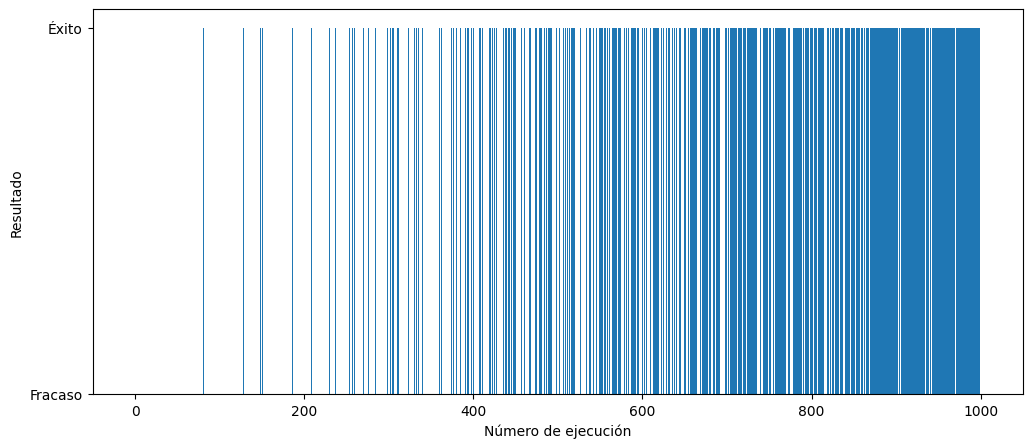

In [45]:
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(resultados)), resultados, width=1.0)
plt.show()

### Evaluación

In [46]:
episodios_evaluacion = 100
conteo_exitos = 0

for _ in range(episodios_evaluacion):
    state = environment.reset()
    done = False

    # Hasta que el agente quede atrapado o alcance la meta, seguir evaluándolo
    while not done:
        # Elegir la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implementar esta acción y mover al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

    # Cuando llegamos a la meta, incrementar el conteo de éxitos
    if reward == 1:
        conteo_exitos += reward

In [47]:
tasa_exito = conteo_exitos / episodios_evaluacion * 100
print(f"Tasa de éxito = {tasa_exito}%")

Tasa de éxito = 100.0%


## Desafío: lago resbaladizo
(is_slippery=True)

### Inicialización
Creamos el entorno Frozen Lake con hielo resbaladizo e inicializamos la tabla Q con ceros.

In [48]:
entorno = gym.make("FrozenLake-v1", is_slippery=True)
entorno.reset()

0

In [49]:
tabla_q = np.zeros((entorno.observation_space.n, entorno.action_space.n))

Definimos los nuevos los parámetros del algoritmo

In [50]:
episodios = 5000        # Aumentamos el número de episodios
alfa = 0.1              # Incrementamos la tasa de aprendizaje
gamma = 0.95            # Incrementamos el factor de descuento
epsilon = 1.0           # Cantidad de aleatoriedad en la selección de acciones
epsilon_decaimiento = 0.0005  # Ajustamos la tasa de decaimiento

In [51]:
resultados = []

print('Tabla Q antes del entrenamiento:')
print(tabla_q)

Tabla Q antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Entrenamiento
Realizamos el entrenamiento del agente mediante Q-learning utilizando la estrategia epsilon-greedy para la selección de acciones

In [52]:
for episodio in range(episodios):
    estado = entorno.reset()
    hecho = False

    # Por defecto, consideramos que el resultado es un fracaso
    resultados.append("Fracaso")

    # Hasta que el agente quede atrapado en un agujero o alcance la meta, seguir entrenándolo
    while not hecho:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, tomar una acción aleatoria
        if rnd < epsilon:
            accion = entorno.action_space.sample()
        # De lo contrario, tomar la acción con el valor más alto en el estado actual
        else:
            accion = np.argmax(tabla_q[estado])

        # Implementar esta acción y mover al agente en la dirección deseada
        nuevo_estado, recompensa, hecho, info = entorno.step(accion)

        # Actualizar Q(s,a)
        tabla_q[estado, accion] = tabla_q[estado, accion] + \
                                  alfa * (recompensa + gamma * np.max(tabla_q[nuevo_estado]) - tabla_q[estado, accion])

        # Actualizar nuestro estado actual
        estado = nuevo_estado

        # Si obtenemos una recompensa, significa que nuestro resultado es un éxito
        if recompensa:
            resultados[-1] = "Éxito"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decaimiento, 0)

print()
print('===========================================')
print('Tabla Q después del entrenamiento (CASO 3):')
print(tabla_q)


Tabla Q después del entrenamiento (CASO 3):
[[0.20364277 0.12428475 0.12365983 0.12392884]
 [0.09633076 0.08482122 0.11251808 0.17216069]
 [0.16598746 0.1151001  0.11557414 0.11563418]
 [0.05677529 0.05085624 0.03237167 0.10648407]
 [0.23643793 0.12851726 0.14057791 0.10181449]
 [0.         0.         0.         0.        ]
 [0.19246551 0.07852729 0.07957967 0.05614444]
 [0.         0.         0.         0.        ]
 [0.15582261 0.18041651 0.14036544 0.31341605]
 [0.16767803 0.42146967 0.21052577 0.23698581]
 [0.48037872 0.22293445 0.22016565 0.2150108 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.27340031 0.26730461 0.59356203 0.312583  ]
 [0.48447609 0.79406538 0.48621902 0.47857733]
 [0.         0.         0.         0.        ]]


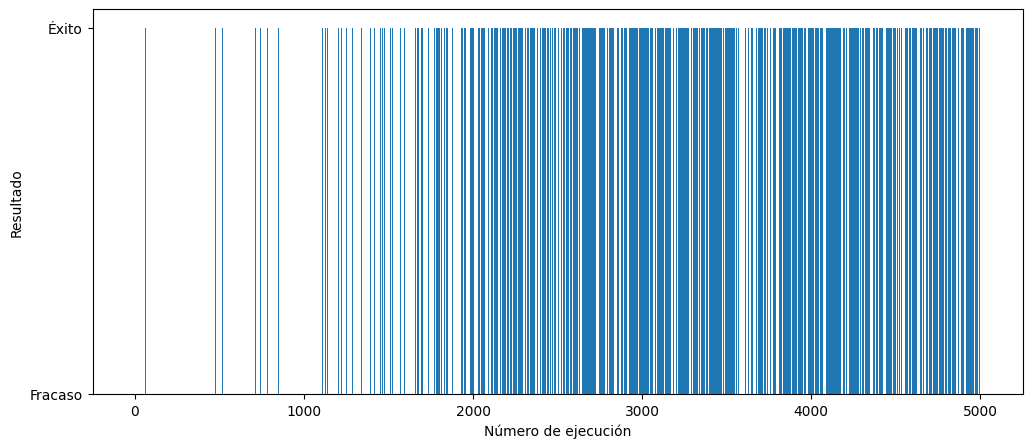

In [53]:
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(resultados)), resultados, width=1.0)
plt.show()


### Evaluación
Evaluamos el desempeño del agente después del entrenamiento en un conjunto separado de episodios

In [54]:
episodios_evaluacion = 100
num_exitos = 0

for _ in range(episodios_evaluacion):
    estado = entorno.reset()
    hecho = False

    # Hasta que el agente quede atrapado o alcance la meta, seguir entrenándolo
    while not hecho:
        # Elegir la acción con el valor más alto en el estado actual
        accion = np.argmax(tabla_q[estado])

        # Implementar esta acción y mover al agente en la dirección deseada
        nuevo_estado, recompensa, hecho, info = entorno.step(accion)

        # Actualizar nuestro estado actual
        estado = nuevo_estado

        # Cuando obtenemos una recompensa, significa que resolvimos el juego
        num_exitos += recompensa

In [55]:
tasa_exito = num_exitos / episodios_evaluacion * 100
print(f"Tasa de éxito = {tasa_exito}%")

Tasa de éxito = 73.0%


## Resultados

**Q-Learning: Caso 1 - Entorno sin deslizamiento** (is_slippery=False):

- *Inicialización*: entorno Frozen Lake sin deslizamiento.

- *Entrenamiento*: el agente se entrena a lo largo de varios episodios. Durante cada episodio, el agente toma acciones, actualiza la tabla Q utilizando la ecuación de Q-learning y ajusta su comportamiento en función de las recompensas obtenidas.

- *Evaluación*: tasa de éxito es del 100%, lo que significa que el agente logró alcanzar el objetivo en todos los episodios de evaluación.  
  
  
**Q-Learning: Caso 2 - Implementación de Epsilon-Greedy** (is_slippery=False):

- *Inicialización*: entorno Frozen Lake sin deslizamiento.

- *Entrenamiento*: se utiliza el algoritmo Epsilon-Greedy para equilibrar la exploración y la explotación. La tabla Q se actualiza a medida que el agente explora y aprende de su experiencia.

- *Evaluación*: tasa de éxito es del 100%, indicando que el agente logra alcanzar el objetivo en todos los episodios de evaluación.    
    
  
**Q-Learning: Caso 3 - Entorno con deslizamiento** (is_slippery=True):

- *Inicialización*: entorno Frozen Lake con deslizamiento.  
  
- *Entrenamiento*: El agente se entrena mediante Q-learning con la estrategia Epsilon-Greedy.

- *Evaluación*: tasa de éxito es del 73%, lo que indica que el agente logra alcanzar el objetivo en el 73% de los episodios de evaluación.





En el caso sin deslizamiento, el agente logra un 100% de éxito en la evaluación. Esto puede deberse a que el entorno es determinista y no hay incertidumbre en las transiciones entre estados.
La implementación de Epsilon-Greedy ayuda a equilibrar la exploración y explotación, lo que puede ser crucial para el éxito del agente en entornos estocásticos o desconocidos.
En el caso con deslizamiento, el éxito del agente en la evaluación es del 73%. El deslizamiento introduce incertidumbre, lo que puede dificultar la tarea del agente. Ajustar los hiperparámetros, como la tasa de aprendizaje y la tasa de decaimiento de epsilon, podría influir en el rendimiento del agente en entornos más desafiantes.

## Mejoras
vamos a cambiar algunos parámetros para ver si conseguimos mejorar el 3º caso.

In [138]:
# Inicializacion
environment = gym.make("FrozenLake-v1", is_slippery=True)
environment.reset()

# Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparametros
episodes = 5000
alpha = 0.1
gamma = 0.99            # Aumentamos el factor de descuento
epsilon = 1.0
epsilon_decay = 0.0005

In [139]:
# Lista de resultados para graficar
outcomes = []

print('Q-table antes del entrenamiento:')
print(qtable)

Q-table antes del entrenamiento:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [140]:
# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False
    outcomes.append("Fracaso")

    while not done:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, tomar una acción aleatoria
        if rnd < epsilon:
            action = environment.action_space.sample()
        # De lo contrario, tomar la acción con el valor más alto en el estado actual
        else:
            action = np.argmax(qtable[state])

        # Implementar esta acción y mover al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si hay recompensa, significa que nuestro resultado es un éxito
        if done and reward:
            outcomes[-1] = "Éxito"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table después del entrenamiento:')
print(qtable)


Q-table después del entrenamiento:
[[0.54863814 0.46666037 0.4657643  0.46650947]
 [0.19393467 0.26419074 0.28071313 0.50555983]
 [0.30084402 0.27203238 0.28965092 0.46025142]
 [0.10169557 0.10129828 0.119145   0.44207074]
 [0.57144805 0.28521492 0.43397186 0.34181815]
 [0.         0.         0.         0.        ]
 [0.37153131 0.15598924 0.17222978 0.05291622]
 [0.         0.         0.         0.        ]
 [0.31124283 0.36795277 0.40848121 0.60616918]
 [0.45711942 0.66160551 0.29614084 0.36820077]
 [0.60430666 0.3580599  0.22098214 0.19487469]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.46380486 0.55510739 0.74632776 0.45161618]
 [0.58618834 0.85077671 0.71927988 0.68437286]
 [0.         0.         0.         0.        ]]


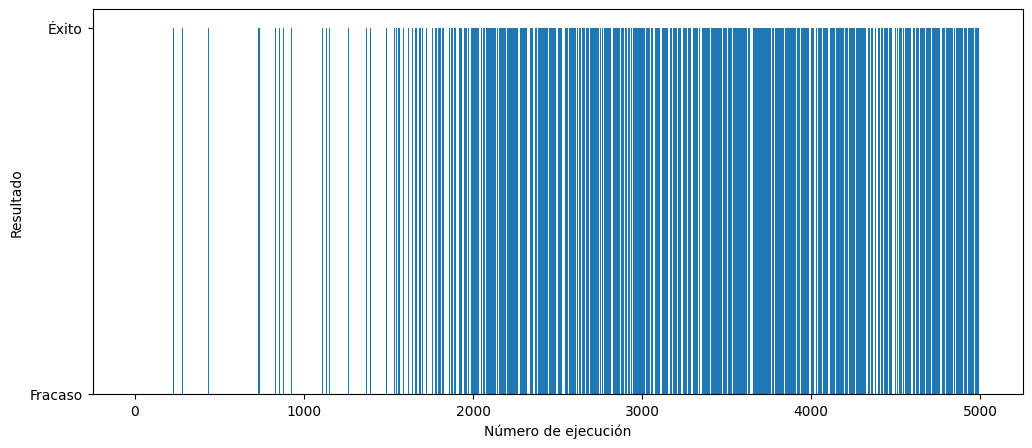

In [141]:
# Graficar resultados
plt.figure(figsize=(12, 5))
plt.xlabel("Número de ejecución")
plt.ylabel("Resultado")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [142]:
# Evaluación
episodes_eval = 100
success_count = 0

for _ in range(episodes_eval):
    state = environment.reset()
    done = False

    while not done:
        # Elegir la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implementar esta acción y mover al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando obtenemos una recompensa, significa que hemos resuelto el juego
        success_count += reward

In [143]:
# Tasa de éxito del agente
success_rate = success_count / episodes_eval * 100
print(f"Tasa de éxito = {success_rate}%")

Tasa de éxito = 83.0%


Al aumentar el factor de descuento gamma a 0.99, se da más peso a las recompensas futuras. Al haber aumentado también el número de episodios, el agente tiene más iteraciones para aprender y ajustar su estrategia. Esto hace que los resultados mejoren.

## Conclusión
En el contexto del experimento estas son algunas reflexiones que se pueden hacer sobre el aprendizaje por refuerzo:
- El equilibrio entre la exploración (acciones aleatorias) y la explotación (acciones basadas en el conocimiento actual) es fundamental en RL. En este experimento, la estrategia epsilon-greedy se utiliza para abordar este dilema, permitiendo al agente explorar nuevas acciones con una probabilidad epsilon y explotar las acciones conocidas con una probabilidad 1-epsilon.

- La introducción de aleatoriedad en el entorno resbaladizo afecta significativamente el rendimiento del agente. La aleatoriedad en las transiciones entre estados implica que el agente debe ser más flexible y adaptarse a diferentes situaciones.

- Los hiperparámetros, como la tasa de aprendizaje (alpha), el factor de descuento (gamma), y la tasa de exploración (epsilon), juegan un papel crucial en el rendimiento del algoritmo. Ajustar estos hiperparámetros de manera efectiva puede ser clave para lograr un equilibrio entre la convergencia rápida y la adaptabilidad del agente.

El aprendizaje por refuerzo permite a los agentes adaptarse a cambios en el entorno. La capacidad de aprender de la experiencia y ajustar estrategias en tiempo real es una fortaleza del RL, el desafío se encuentra en realizar una cuidadosa sintonización de hiperparámetros y estrategias para abordar la exploración y la explotación de manera efectiva.